# Spotify Songs  - Part 2: Genre classification with sklearn 

This is the second part of a project with a <a href="https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db/data#">dataset</a> from Spotify with 232,725 songs, with approximately 10,000 songs per genre. Part 1 explored and visualized the dataset and found that the different genres vary only little in some of the provided variables.

#### Variables
Genre: Genre of the song e.g. Rock, Rap, Electronic
Popularity: Score from 0 to 100
Tempo : Measured in Beats Per Minute <br>
Energy: The energy of a song - the higher the value, the more energtic.<br>
Danceability: The higher the value, the easier it is to dance to this song.<br>
Loudness..dB: The higher the value, the louder the song.<br>
Liveness: The higher the value, the more likely the song is a live recording.<br>
Valence: The higher the value, the more positive mood for the song.<br>
Duration_ms: The duration of the song.<br>
Acousticness:The higher the value the more acoustic the song is.<br>
Speechiness:The higher the value the more spoken word the song contains.<br>
Popularity:The higher the value the more popular the song is.<br>
key: The key the song was composed in e.g. F#, G, A#<br>
mode: The musical scale e.g. minor or major <br>


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn import svm 
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv('SpotifyFeatures.csv', index_col = "track_id")   
df.tail(2)

,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,,,,,
6EFsue2YbIG4Qkq8Zr9Rir,Soul,R.LUM.R,With My Words,44,0.2620,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489
34XO9RwPMKjbvRry54QzWn,Soul,Mint Condition,You Don't Have To Hurt No More,35,0.0973,0.758,323027,0.470,0.000049,G#,0.0836,-6.708,Minor,0.0287,113.897,4/4,0.479


In [3]:
# checking for duplicates and missing values  
test = df.duplicated().sum()
print('The number of duplicates is:',test)

test2 = df.isnull().sum()
print("Missing values by variable:")
print(test2)

The number of duplicates is: 0
Missing values by variable:
genre               0
artist_name         0
track_name          0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64


#### Dropping two genres
There are too few 'A capella' songs, and 'Children's Music' appeared twice with different spelling in the original dataset.

In [4]:
df = df[(df.genre != "A Capella") & (df.genre != "Children's Music")]


In [23]:
df['genre'].nunique()

25

#### Transformation & Normalization  
'mode'(Minor/Major), 'time_signature' (3/4, 4/4 etc.), get transformed. 'tempo' which is measured in Beats per Minute(BPM) e.g. 160 gets normalized as most other variables are already on a scale from 0 to 1. 

In [5]:
df["mode"] = df["mode"].astype('category')
df['mode_codes'] = df['mode'].cat.codes

df["time_signature"] = df["time_signature"].astype('category')
df['time_signature_codes'] = df['time_signature'].cat.codes

df["key"] = df["key"].astype('category')
df['key_codes'] = df['key'].cat.codes

#df = pd.get_dummies(df, columns=['key','time_signature'])   ### dummy variable

#### Splitting the data

In [6]:
Y_df = df['genre']

X_df = df.drop(['genre','artist_name','track_name','mode','key','time_signature'], axis=1)


scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_df)
X_df = scaling.transform(X_df)
print(pd.DataFrame(X_df).head(2))

      0         1         2         3         4    5         6         7  \
0 -1.00  0.226908 -0.285883 -0.969710  0.821818 -1.0 -0.320772  0.801712   
1 -0.98 -0.506024  0.146328 -0.955985  0.475465 -1.0 -0.714580  0.668938   

          8         9     10   11   12        13  
0 -0.935859  0.285408  0.628 -1.0  0.5 -0.272727  
1 -0.863251  0.351603  0.632  1.0  0.5  0.636364  


In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_df, Y_df, test_size=0.20, random_state=0)

### Random Forest 

In [8]:
rf = RandomForestClassifier(n_estimators = 50, n_jobs=-2, max_depth = 10)

In [9]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-2,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [10]:
rf_pred = rf.predict(x_test)

In [11]:
print(classification_report(y_test,rf_pred))

                  precision    recall  f1-score   support

     Alternative       0.28      0.19      0.22      1808
           Anime       0.61      0.52      0.56      1814
           Blues       0.38      0.38      0.38      1845
Children’s Music       0.23      0.18      0.20      1846
       Classical       0.60      0.63      0.62      1841
          Comedy       0.98      0.94      0.96      1881
         Country       0.34      0.33      0.34      1740
           Dance       0.18      0.11      0.13      1758
      Electronic       0.50      0.53      0.51      1852
            Folk       0.24      0.37      0.29      1810
         Hip-Hop       0.26      0.48      0.34      1844
           Indie       0.19      0.13      0.15      1878
            Jazz       0.40      0.31      0.35      1947
           Movie       0.69      0.58      0.63      1561
           Opera       0.71      0.87      0.78      1696
             Pop       0.28      0.48      0.36      1949
             

### AdaBoost

In [12]:
ada = AdaBoostClassifier(n_estimators=20,base_estimator=rf2, random_state=0) 

In [13]:
ada.fit(x_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=10,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=50,
                           

In [14]:
ada_pred = ada.predict(x_test)
print(classification_report(y_test,ada_pred))

                  precision    recall  f1-score   support

     Alternative       0.25      0.17      0.20      1808
           Anime       0.67      0.56      0.61      1814
           Blues       0.44      0.43      0.44      1845
Children’s Music       0.18      0.15      0.17      1846
       Classical       0.58      0.51      0.54      1841
          Comedy       0.98      0.93      0.96      1881
         Country       0.40      0.40      0.40      1740
           Dance       0.18      0.19      0.19      1758
      Electronic       0.53      0.55      0.54      1852
            Folk       0.22      0.28      0.24      1810
         Hip-Hop       0.30      0.37      0.33      1844
           Indie       0.14      0.16      0.15      1878
            Jazz       0.42      0.39      0.40      1947
           Movie       0.66      0.61      0.63      1561
           Opera       0.70      0.84      0.76      1696
             Pop       0.29      0.15      0.20      1949
             

### Neural Network

In [15]:
nn = MLPClassifier(hidden_layer_sizes=(10,10),max_iter=250)

In [16]:
nn.fit(x_train,y_train)
nn_pred = nn.predict(x_test)

C:\Users\imper\Miniconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
print(classification_report(y_test,nn_pred))

                  precision    recall  f1-score   support

     Alternative       0.24      0.25      0.24      1808
           Anime       0.53      0.51      0.52      1814
           Blues       0.35      0.33      0.34      1845
Children’s Music       0.27      0.12      0.17      1846
       Classical       0.58      0.54      0.56      1841
          Comedy       0.95      0.93      0.94      1881
         Country       0.29      0.29      0.29      1740
           Dance       0.19      0.09      0.12      1758
      Electronic       0.47      0.49      0.48      1852
            Folk       0.26      0.26      0.26      1810
         Hip-Hop       0.29      0.48      0.36      1844
           Indie       0.18      0.15      0.16      1878
            Jazz       0.34      0.30      0.32      1947
           Movie       0.65      0.55      0.59      1561
           Opera       0.67      0.81      0.73      1696
             Pop       0.29      0.52      0.37      1949
             

### Why is the performance so poor? 

We see that genres that the models performed best for genres that are easy to distinguish from others, such as 'comedy' or 'opera'. However, almost all other genres (25 in total) aren't as easily distinguishable from each other with the given variables. Let's visualize the mean value of each genre across all variables, and see if the problem discovered in Part 1 extends to more variables. For that we need to get tempo and the code variables on a scale from 0 to 1 like most other variables already are.

In [18]:
df2 = df 
df2.reset_index(level=0, inplace=True)

scaler = MinMaxScaler()

df2[['popularity','time_signature_codes','key_codes','tempo','loudness']] = scaler.fit_transform(df2[['popularity','time_signature_codes','key_codes','tempo','loudness']])
df2 = df2.drop(['track_id','artist_name','track_name','duration_ms','key','mode','time_signature'], axis = 1)

In [20]:
df3 = df2.groupby(['genre']).mean()
df3.reset_index(level=0, inplace=True)

In [21]:
df3 = pd.melt(df3, "genre", var_name="measurement")

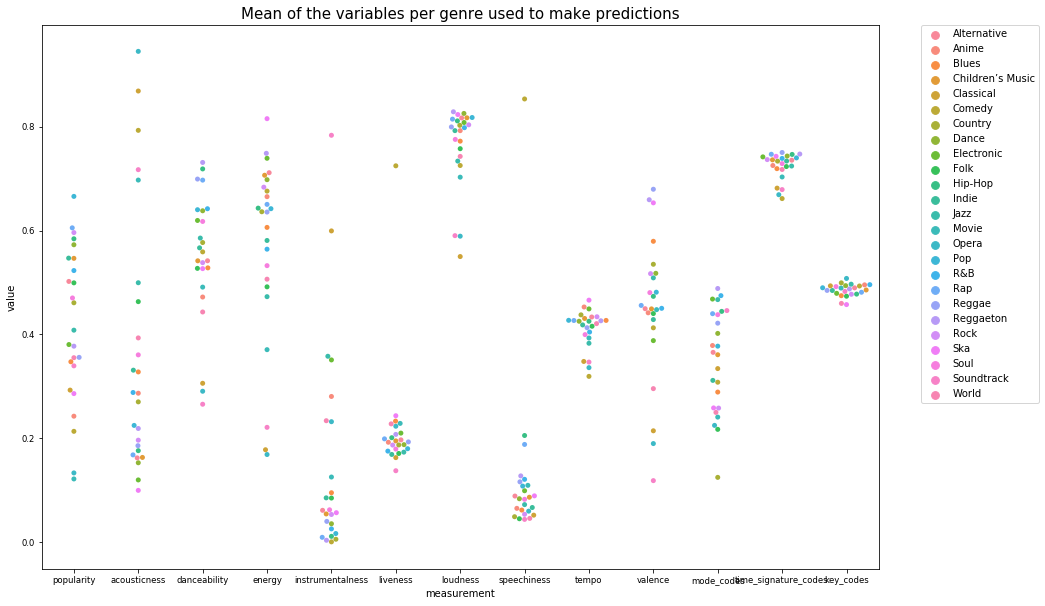

In [22]:
f, ax = plt.subplots(figsize=(15, 10))
ax.tick_params(labelsize = 8.5)
ax.set_title('Mean of the variables per genre used to make predictions', fontsize = 15)
sns.swarmplot(x="measurement", y="value", hue="genre",data=df3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
